Name -Rutik Kothwala
UID - U01868702
Introduction to Deep Learning

In [82]:

import numpy as np
import pandas as pd
import tensorflow as tf
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [83]:
df_reviews= pd.read_csv('C:/Users/rutik/Downloads/IMDB Dataset.csv')

In [84]:
df_reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [116]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


# Data Pre Processing

In [85]:
df_reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

In [86]:
# Map sentiment labels to numerical values
sentiment_mapping = {'positive': 1, 'negative': 0}
df_reviews['sentiment'] = df_reviews['sentiment'].map(sentiment_mapping)

In [87]:
df_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [117]:
import pandas as pd
import matplotlib.pyplot as plt


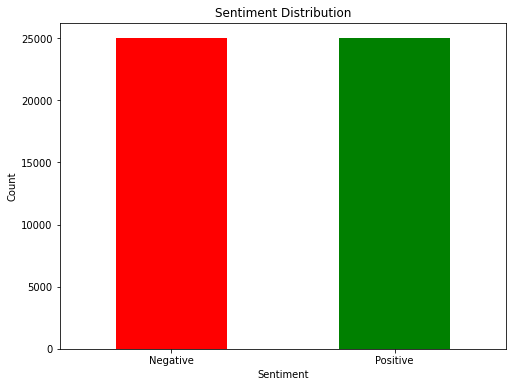

In [118]:
# Plotting
plt.figure(figsize=(8, 6))
df_reviews['sentiment'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'], rotation=0)
plt.show()

In [119]:
# It can be observed our dataset is balanced 

In [88]:
# Convert text to lowercase and remove special characters
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

In [89]:
df_reviews['review'] = df_reviews['review'].apply(clean_text)

In [90]:
df_reviews

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,i am a catholic taught in parochial elementary...,0
49998,im going to have to disagree with the previous...,0


In [91]:
# Split data into input text and sentiment label
X = df_reviews['review'].values
y = df_reviews['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:

# Tokenize the text data
max_words = 25000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)

In [93]:
words_to_index = tokenizer.word_index

In [94]:
# Convert text to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [95]:
# Pad sequences to have consistent length
max_sequence_length = 200  # You can choose an appropriate length based on your data
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Model Building

In [97]:

# Get the vocabulary size
vocab_size = len(tokenizer.word_index) + 1

In [16]:


# Build the LSTM Recurrent Neural Network
embedding_dim = 100
lstm_units = 64

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(LSTM(units=lstm_units))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer with binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
ouour 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          18163200  
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 18,207,553
Trainable params: 18,207,553
Non-trainable params: 0
_________________________________________________________________


In [17]:
batch_size = 70
epochs=10

In [18]:

checkpoint_filepath = '/content/drive/MyDrive/Train/model'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [19]:
model1=model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test),callbacks=[model_checkpoint])

Epoch 1/10
572/572 [==============================] - ETA: 0s - loss: 0.6379 - accuracy: 0.6345

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model\assets


572/572 [==============================] - 183s 315ms/step - loss: 0.6379 - accuracy: 0.6345 - val_loss: 0.6004 - val_accuracy: 0.6673
Epoch 2/10
572/572 [==============================] - 176s 308ms/step - loss: 0.5477 - accuracy: 0.7375 - val_loss: 0.6698 - val_accuracy: 0.5702
Epoch 3/10
572/572 [==============================] - ETA: 0s - loss: 0.5682 - accuracy: 0.6924

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model\assets


572/572 [==============================] - 184s 321ms/step - loss: 0.5682 - accuracy: 0.6924 - val_loss: 0.5336 - val_accuracy: 0.7001
Epoch 4/10
572/572 [==============================] - ETA: 0s - loss: 0.5851 - accuracy: 0.6885

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model\assets


572/572 [==============================] - 206s 360ms/step - loss: 0.5851 - accuracy: 0.6885 - val_loss: 0.5162 - val_accuracy: 0.7782
Epoch 5/10
572/572 [==============================] - ETA: 0s - loss: 0.3251 - accuracy: 0.8704

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model\assets


572/572 [==============================] - 211s 369ms/step - loss: 0.3251 - accuracy: 0.8704 - val_loss: 0.2895 - val_accuracy: 0.8848
Epoch 6/10
572/572 [==============================] - 177s 310ms/step - loss: 0.2038 - accuracy: 0.9316 - val_loss: 0.3227 - val_accuracy: 0.8813
Epoch 7/10
572/572 [==============================] - 177s 309ms/step - loss: 0.1448 - accuracy: 0.9562 - val_loss: 0.3835 - val_accuracy: 0.8758
Epoch 8/10
572/572 [==============================] - 182s 318ms/step - loss: 0.1221 - accuracy: 0.9645 - val_loss: 0.4000 - val_accuracy: 0.8814
Epoch 9/10
572/572 [==============================] - 176s 307ms/step - loss: 0.0799 - accuracy: 0.9801 - val_loss: 0.4190 - val_accuracy: 0.8796
Epoch 10/10
572/572 [==============================] - 180s 315ms/step - loss: 0.0703 - accuracy: 0.9831 - val_loss: 0.5426 - val_accuracy: 0.8684


In [20]:
# Load the model from the saved file
model=load_model("/content/drive/MyDrive/Train/model")

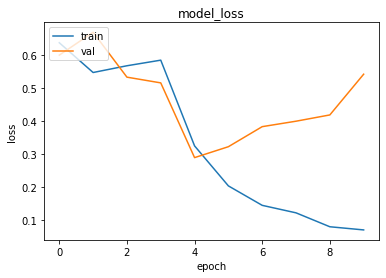

In [22]:

plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

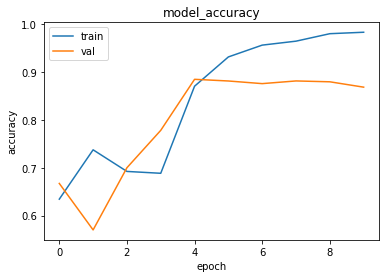

In [24]:

plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [114]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

313/313 [==============================] - 8s 23ms/step
Accuracy: 0.8848
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      4961
           1       0.89      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



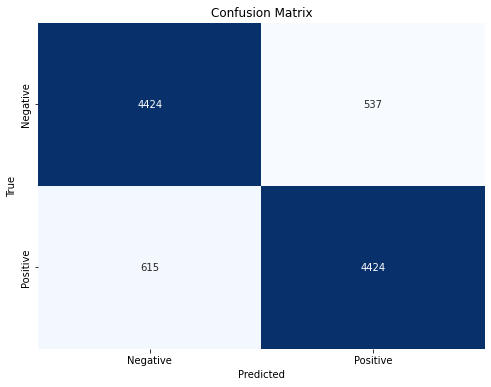

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate the model on the testing dataset
y_pred = model.predict(X_test_padded)
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Fine Tunning and Optimization

In [27]:
from tensorflow.keras.layers import GRU

# Build a GRU Recurrent Neural Network
embedding_dim = 100
gru_units = 64

model4 = Sequential()
model4.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model4.add(GRU(units=gru_units))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model4.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 100)          2500000   
                                                                 
 gru (GRU)                   (None, 64)                31872     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2,536,097
Trainable params: 2,536,097
Non-trainable params: 0
_________________________________________________________________


In [28]:
batch_size = 100
epochs=10

In [29]:

checkpoint_filepath1 = '/content/drive/MyDrive/Train/model4'
model4_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [30]:
model4=model4.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test),callbacks=[model4_checkpoint])

Epoch 1/10
400/400 [==============================] - ETA: 0s - loss: 0.6110 - accuracy: 0.6275

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model4\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model4\assets


400/400 [==============================] - 128s 315ms/step - loss: 0.6110 - accuracy: 0.6275 - val_loss: 0.3765 - val_accuracy: 0.8594
Epoch 2/10
400/400 [==============================] - ETA: 0s - loss: 0.2784 - accuracy: 0.8952

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model4\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model4\assets


400/400 [==============================] - 118s 296ms/step - loss: 0.2784 - accuracy: 0.8952 - val_loss: 0.2461 - val_accuracy: 0.9008
Epoch 3/10
400/400 [==============================] - ETA: 0s - loss: 0.1540 - accuracy: 0.9477

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model4\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model4\assets


400/400 [==============================] - 113s 282ms/step - loss: 0.1540 - accuracy: 0.9477 - val_loss: 0.2545 - val_accuracy: 0.9019
Epoch 4/10
400/400 [==============================] - 120s 301ms/step - loss: 0.0862 - accuracy: 0.9736 - val_loss: 0.3127 - val_accuracy: 0.8912
Epoch 5/10
400/400 [==============================] - 136s 340ms/step - loss: 0.0548 - accuracy: 0.9839 - val_loss: 0.3587 - val_accuracy: 0.8904
Epoch 6/10
400/400 [==============================] - 140s 351ms/step - loss: 0.0356 - accuracy: 0.9905 - val_loss: 0.4652 - val_accuracy: 0.8851
Epoch 7/10
400/400 [==============================] - 144s 361ms/step - loss: 0.0234 - accuracy: 0.9935 - val_loss: 0.5388 - val_accuracy: 0.8836
Epoch 8/10
400/400 [==============================] - 151s 377ms/step - loss: 0.0230 - accuracy: 0.9934 - val_loss: 0.6006 - val_accuracy: 0.8818
Epoch 9/10
400/400 [==============================] - 145s 363ms/step - loss: 0.0153 - accuracy: 0.9959 - val_loss: 0.6983 - val_accura

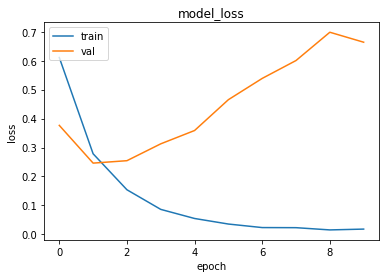

In [31]:

plt.plot(model4.history['loss'])
plt.plot(model4.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:

plt.plot(model4.history['accuracy'])
plt.plot(model4.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [111]:
# Load the model from the saved file
model4=load_model("/content/drive/MyDrive/Train/model4")

313/313 [==============================] - 7s 21ms/step
Accuracy: 0.9019
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      4961
           1       0.89      0.92      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



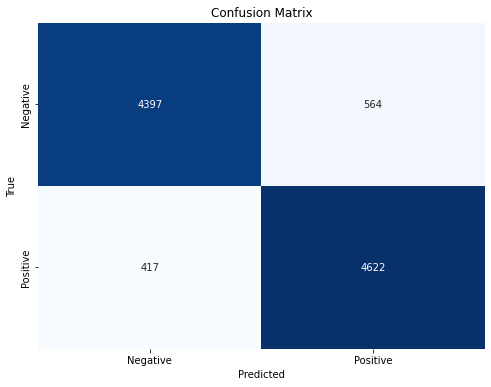

In [34]:
# Evaluate the model on the testing dataset
y_pred1 = model4.predict(X_test_padded)
y_pred_classes1 = (y_pred1 > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes1)
print(f'Accuracy: {accuracy:.4f}')

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes1))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Word Embedding with use of pre trained model Glove

In [99]:

lstm_units = 64

In [101]:
import numpy as np
from keras.layers import Embedding

# Step 1: Download GloVe embeddings
# You can download GloVe embeddings from: https://nlp.stanford.edu/projects/glove/

# Load GloVe embeddings into memory
glove_path = "C:/Users/rutik\Downloads/glove.6B.50d.txt"
embedding_index = {}
with open(glove_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Step 2: Create an embedding matrix
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Step 3: Modify our model to use GloVe embeddings
model5 = Sequential()
model5.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
model5.add(LSTM(units=lstm_units))
model5.add(Dense(32, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

# Compile the model
model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 50)           9081600   
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,113,153
Trainable params: 31,553
Non-trainable params: 9,081,600
_________________________________________________________________


In [103]:

checkpoint_filepath1 = '/content/drive/MyDrive/Train/model5'
model5_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath1,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [107]:
batch_size = 100
epochs= 10

In [108]:
model5=model5.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test_padded, y_test),callbacks=[model5_checkpoint])

Epoch 1/10
400/400 [==============================] - ETA: 0s - loss: 0.6782 - accuracy: 0.5600

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


400/400 [==============================] - 77s 186ms/step - loss: 0.6782 - accuracy: 0.5600 - val_loss: 0.6009 - val_accuracy: 0.7253
Epoch 2/10
400/400 [==============================] - 44s 111ms/step - loss: 0.6763 - accuracy: 0.5705 - val_loss: 0.6482 - val_accuracy: 0.6036
Epoch 3/10
400/400 [==============================] - 53s 132ms/step - loss: 0.6643 - accuracy: 0.5974 - val_loss: 0.6820 - val_accuracy: 0.5558
Epoch 4/10
400/400 [==============================] - ETA: 0s - loss: 0.6496 - accuracy: 0.6069

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


400/400 [==============================] - 61s 153ms/step - loss: 0.6496 - accuracy: 0.6069 - val_loss: 0.5396 - val_accuracy: 0.7568
Epoch 5/10
400/400 [==============================] - 59s 148ms/step - loss: 0.6062 - accuracy: 0.6929 - val_loss: 0.6768 - val_accuracy: 0.5461
Epoch 6/10
400/400 [==============================] - 68s 171ms/step - loss: 0.6702 - accuracy: 0.5692 - val_loss: 0.6369 - val_accuracy: 0.5928
Epoch 7/10
400/400 [==============================] - ETA: 0s - loss: 0.5266 - accuracy: 0.7561

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


400/400 [==============================] - 71s 178ms/step - loss: 0.5266 - accuracy: 0.7561 - val_loss: 0.4441 - val_accuracy: 0.7928
Epoch 8/10
400/400 [==============================] - ETA: 0s - loss: 0.4349 - accuracy: 0.8076

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


400/400 [==============================] - 80s 201ms/step - loss: 0.4349 - accuracy: 0.8076 - val_loss: 0.4006 - val_accuracy: 0.8193
Epoch 9/10
400/400 [==============================] - ETA: 0s - loss: 0.4073 - accuracy: 0.8216

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


400/400 [==============================] - 74s 186ms/step - loss: 0.4073 - accuracy: 0.8216 - val_loss: 0.3889 - val_accuracy: 0.8247
Epoch 10/10
400/400 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8298

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Train\model5\assets


400/400 [==============================] - 87s 216ms/step - loss: 0.3912 - accuracy: 0.8298 - val_loss: 0.3729 - val_accuracy: 0.8336


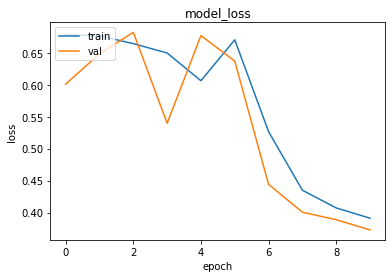

In [109]:

plt.plot(model5.history['loss'])
plt.plot(model5.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

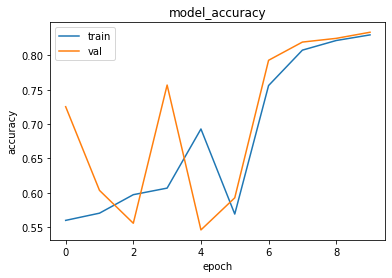

In [110]:
plt.plot(model5.history['accuracy'])
plt.plot(model.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [112]:
# Load the model from the saved file
model5=load_model("/content/drive/MyDrive/Train/model5")

313/313 [==============================] - 7s 21ms/step
Accuracy: 0.8336
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.84      4961
           1       0.86      0.81      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



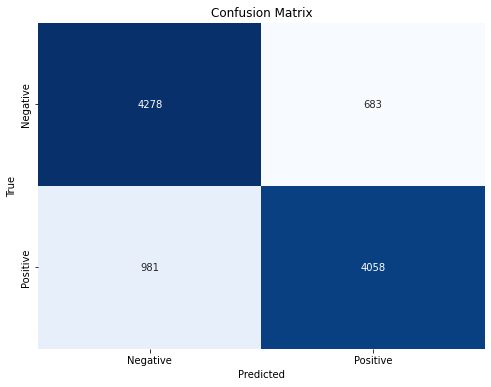

In [115]:
# Evaluate the model on the testing dataset
y_pred1 = model5.predict(X_test_padded)
y_pred_classes1 = (y_pred1 > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes1)
print(f'Accuracy: {accuracy:.4f}')

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes1))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_classes1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Conclusion:Our sentiment analysis model, crafted with TensorFlow and RNNs (Recurrent Neural Networks), emerges as a robust tool for unraveling sentiments within movie reviews. This technology extends its impact across diverse domains, demonstrating versatility in applications such as customer feedback analysis, movie recommendation systems, and market sentiment monitoring. The model's proficiency in discerning sentiments positions it as a valuable asset with significant potential across a spectrum of industries and use cases.
